In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [125]:
df=pd.read_csv("/credit_score_dataset.csv")

In [126]:
print(df.columns)
print(df.shape)

Index(['customer_id', 'age', 'gender', 'location', 'monthly_income',
       'current_outstanding', 'credit_utilization_ratio', 'num_open_loans',
       'repayment_history_score', 'dpd_last_3_months',
       'num_hard_inquiries_last_6m', 'recent_credit_card_usage',
       'recent_loan_disbursed_amount', 'total_credit_limit',
       'months_since_last_default', 'monthly_emi_outflow',
       'target_credit_score_movement'],
      dtype='object')
(25000, 17)


In [127]:
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   25000 non-null  int64  
 1   age                           25000 non-null  int64  
 2   gender                        25000 non-null  object 
 3   location                      25000 non-null  object 
 4   monthly_income                25000 non-null  int64  
 5   current_outstanding           25000 non-null  int64  
 6   credit_utilization_ratio      25000 non-null  float64
 7   num_open_loans                25000 non-null  int64  
 8   repayment_history_score       25000 non-null  int64  
 9   dpd_last_3_months             25000 non-null  int64  
 10  num_hard_inquiries_last_6m    25000 non-null  int64  
 11  recent_credit_card_usage      25000 non-null  int64  
 12  recent_loan_disbursed_amount  25000 non-null  int64  
 13  t

,customer_id,age,gender,location,monthly_income,current_outstanding,credit_utilization_ratio,num_open_loans,repayment_history_score,dpd_last_3_months,num_hard_inquiries_last_6m,recent_credit_card_usage,recent_loan_disbursed_amount,total_credit_limit,months_since_last_default,monthly_emi_outflow,target_credit_score_movement
count,25000.000000,25000.000000,25000,25000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,2.500000e+04,25000.000000,25000.000000,25000
unique,NaN,NaN,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Female,Chennai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stable
freq,NaN,NaN,12016,5083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22626
mean,5493.815120,42.569600,NaN,NaN,107304.454520,498123.118240,0.646699,4.494440,50.248600,44.443560,1.987960,149857.250560,249532.87696,1.027680e+06,29.481160,42920.331880,NaN
std,2601.496587,12.728637,NaN,NaN,53623.396507,289598.569565,0.317776,2.874853,29.126933,25.980201,1.412818,86469.081811,144598.03042,5.640283e+05,17.330352,30043.551482,NaN
min,1000.000000,21.000000,NaN,NaN,15023.000000,8.000000,0.100003,0.000000,0.000000,0.000000,0.000000,16.000000,4.00000,5.011400e+04,0.000000,1584.000000,NaN
25%,3233.000000,31.000000,NaN,NaN,60892.000000,245470.500000,0.371202,2.000000,25.000000,22.000000,1.000000,75427.750000,124348.00000,5.419720e+05,14.000000,18600.500000,NaN
50%,5507.000000,43.000000,NaN,NaN,106909.500000,498206.000000,0.643812,4.000000,50.000000,44.000000,2.000000,149700.000000,248874.50000,1.028194e+06,29.000000,35295.500000,NaN
75%,7748.000000,54.000000,NaN,NaN,153705.250000,748233.500000,0.920581,7.000000,76.000000,67.000000,3.000000,224471.500000,374293.50000,1.514882e+06,44.000000,61727.000000,NaN


In [128]:
df['target_credit_score_movement'].value_counts(normalize=True)

,proportion
target_credit_score_movement,
stable,0.90504
decrease,0.09404
increase,0.00092


#EDA

CLASS BALANCE

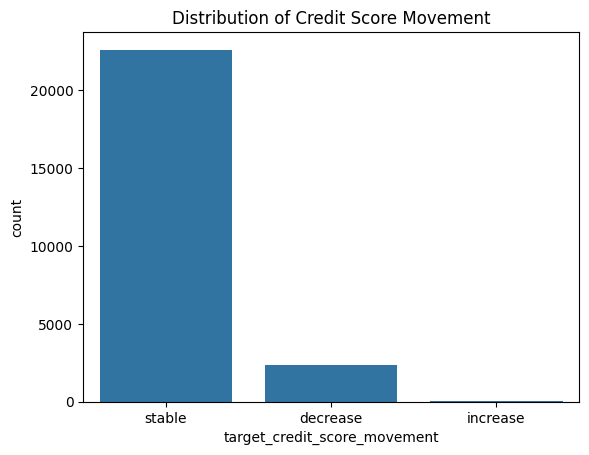

In [129]:
sns.countplot(data=df, x='target_credit_score_movement')
plt.title("Distribution of Credit Score Movement")
plt.show()

CORRELATION HEATMAP

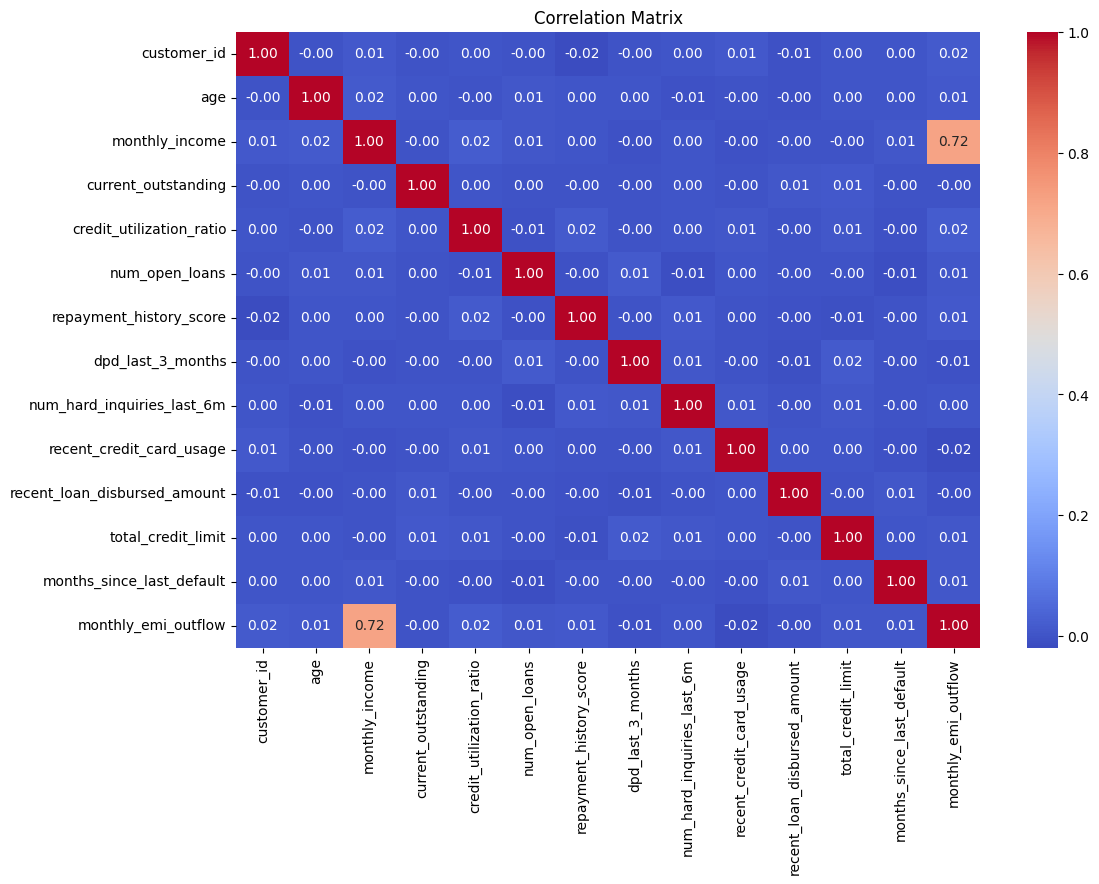

In [130]:
numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

EMI TO INCOME RATIO

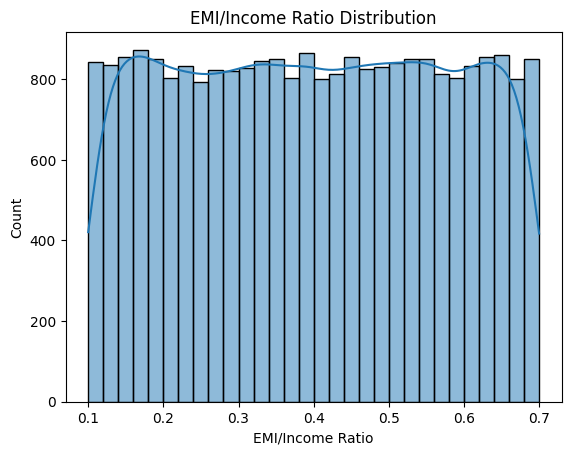

In [131]:
df["emi_income_ratio"] = df["monthly_emi_outflow"] / df["monthly_income"]

sns.histplot(df["emi_income_ratio"], bins=30, kde=True)
plt.title("EMI/Income Ratio Distribution")
plt.xlabel("EMI/Income Ratio")
plt.show()

Distribution of Key Risk Factors

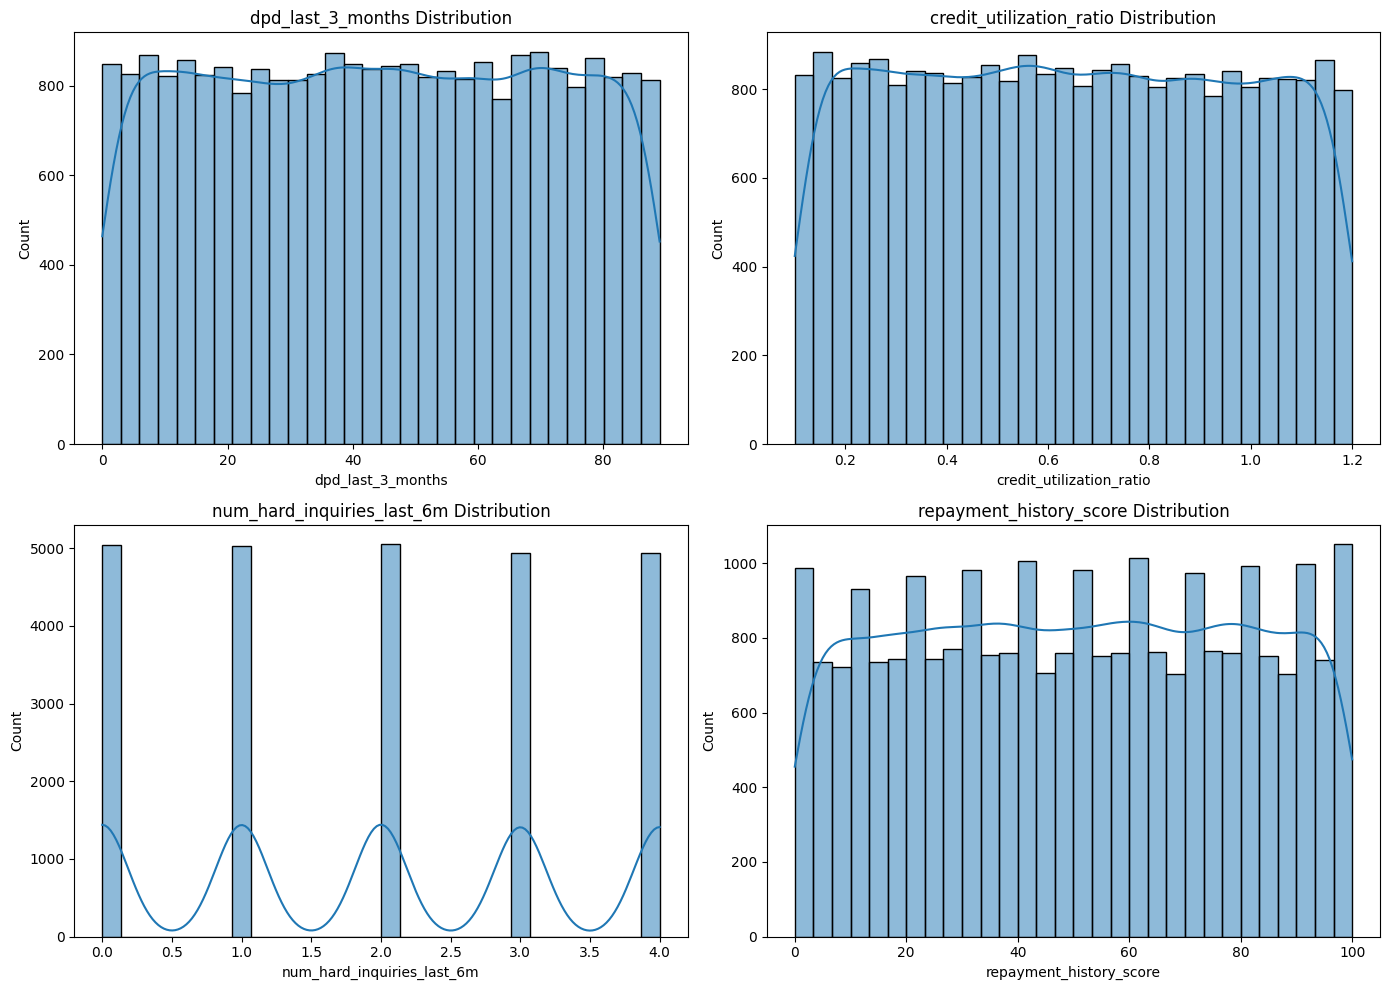

In [132]:
features = ["dpd_last_3_months", "credit_utilization_ratio",
            "num_hard_inquiries_last_6m", "repayment_history_score"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

Boxplots by Target Class

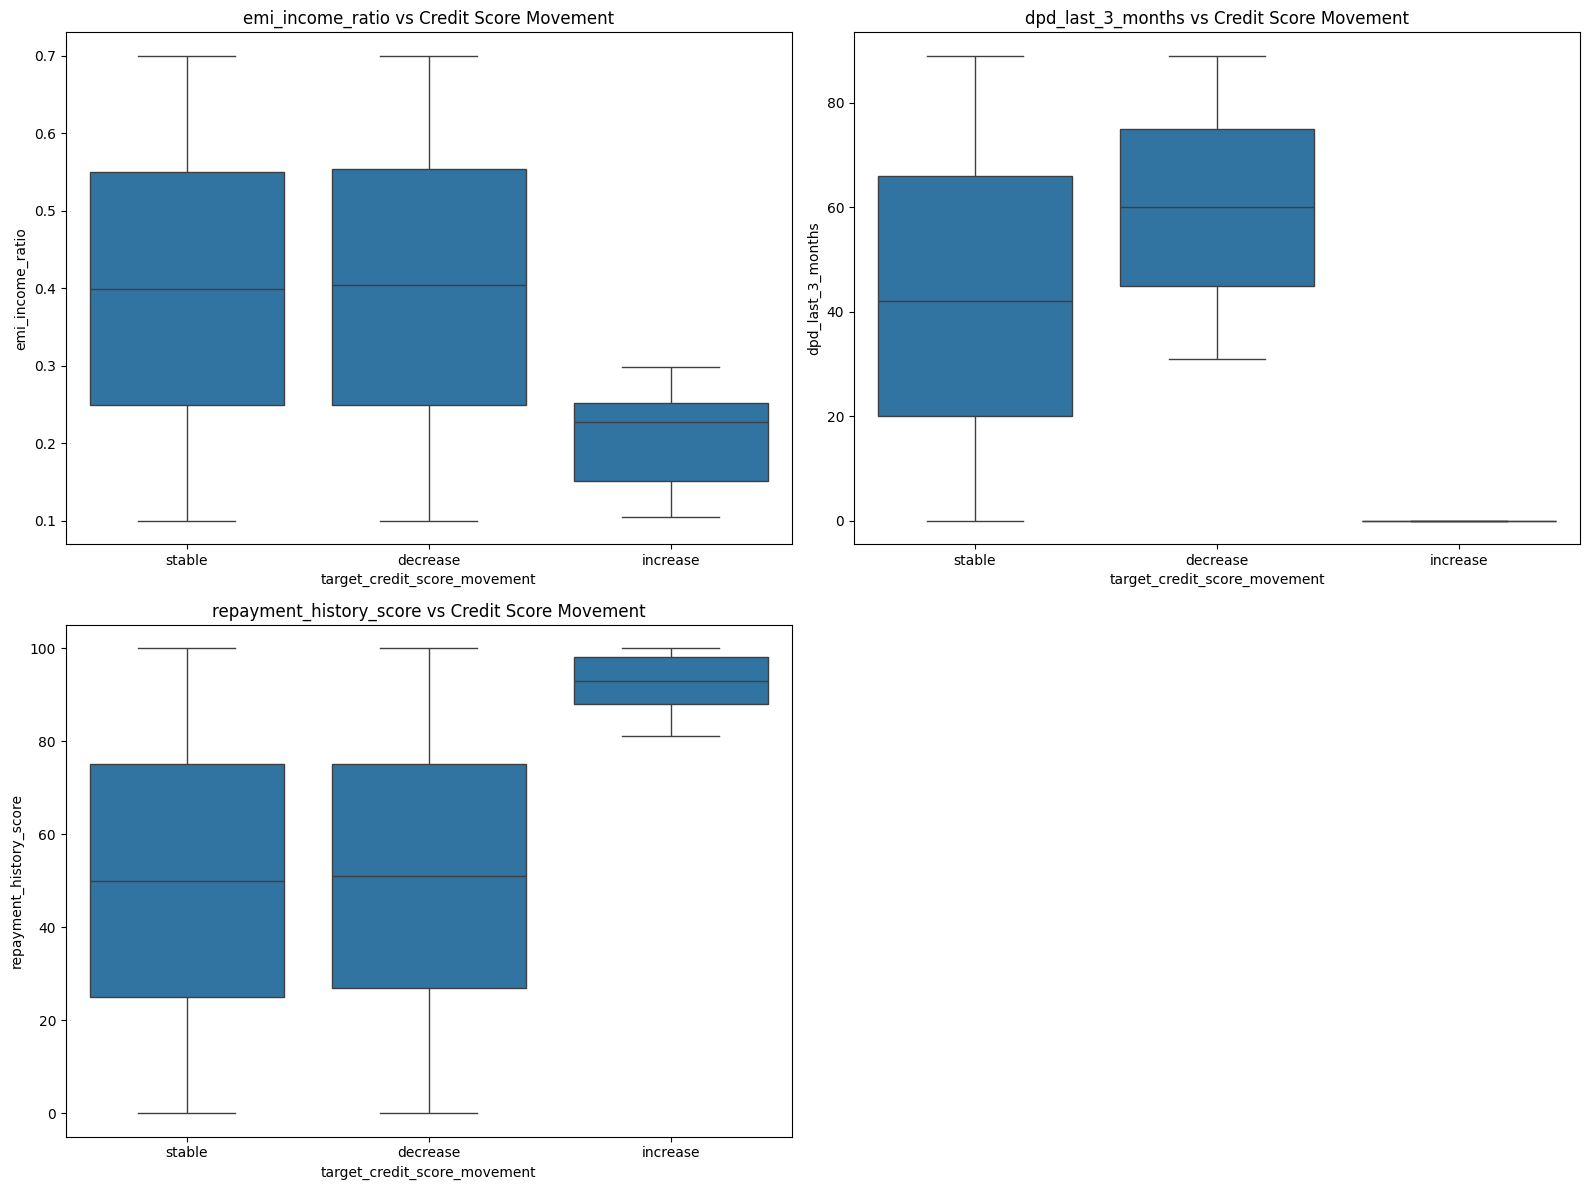

In [133]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(["emi_income_ratio", "dpd_last_3_months", "repayment_history_score"]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='target_credit_score_movement', y=col, data=df)
    plt.title(f'{col} vs Credit Score Movement')
plt.tight_layout()
plt.show()

Categorical Analysis (Gender, Location)

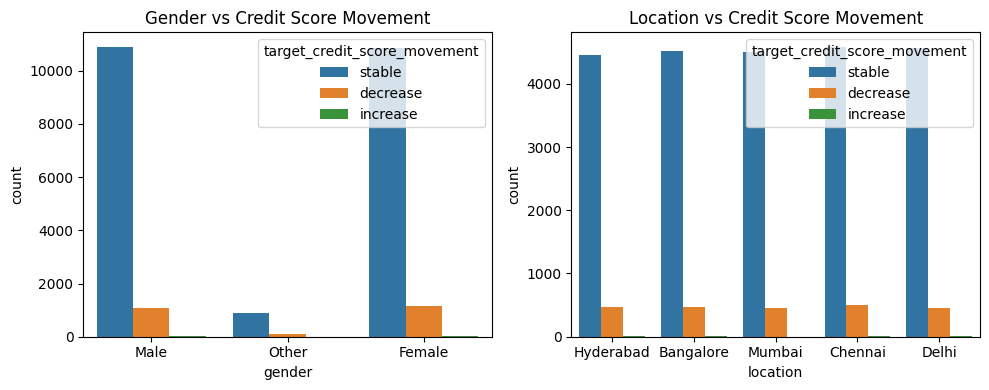

In [134]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='gender', hue='target_credit_score_movement')
plt.title("Gender vs Credit Score Movement")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='location', hue='target_credit_score_movement')
plt.title("Location vs Credit Score Movement")

plt.tight_layout()
plt.show()

# DATA PREPROCESSING

In [135]:
# # Feature Engineering
# df["emi_income_ratio"] = df["monthly_emi_outflow"] / df["monthly_income"]
# df["post_emi_income"] = df["monthly_income"] - df["monthly_emi_outflow"]
# df["total_utilized_credit"] = df["credit_utilization_ratio"] * df["total_credit_limit"]
# df["inquiries_per_loan"] = df["num_hard_inquiries_last_6m"] / (df["num_open_loans"] + 1)
# df["recent_default_flag"] = (df["months_since_last_default"] <= 3).astype(int)

# # Drop redundant columns
# df.drop(columns=[
#     'monthly_emi_outflow', 'monthly_income',
#     'credit_utilization_ratio', 'total_credit_limit',
#     'num_hard_inquiries_last_6m', 'num_open_loans',
#     'months_since_last_default'], inplace=True)

In [136]:
cat_features = ['gender', 'location']
num_features = [col for col in df.columns if col not in ['gender', 'location' , 'target_credit_score_movement', 'customer_id']]

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])


In [137]:
X = df.drop(columns=['target_credit_score_movement', 'customer_id'])
y = df['target_credit_score_movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Trying different models (RandomForestClassifier, LogisticRegression, SVC, XG Boost)

Accuracy: 0.999
F1-score: 0.77723873
Class-wise Recall:
  - decrease: 0.99787234
  - increase: 0.2
  - stable: 1.0


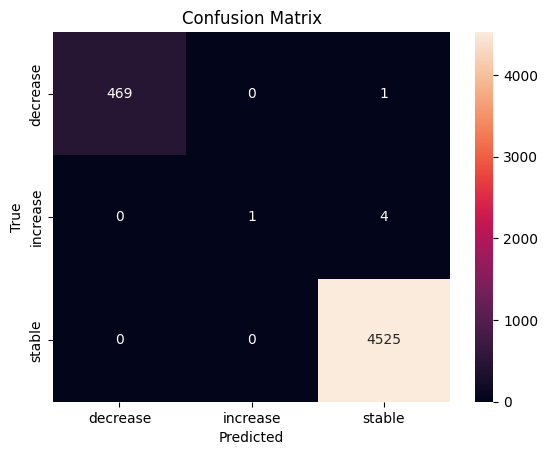

In [138]:
model = Pipeline([
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc,8))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", round(f1,8))

clf_report= classification_report(y_test, y_pred, output_dict=True)
print("Class-wise Recall:")
for cls in model.named_steps['clf'].classes_:
    recall = clf_report[cls]['recall']
    print(f"  - {cls}: {round(recall, 8)}")

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Logistic Regression
Accuracy: 0.9016
F1-score: 0.57675286
Class-wise Recall:
  - decrease: 0.92978723
  - increase: 0.6
  - stable: 0.89900552


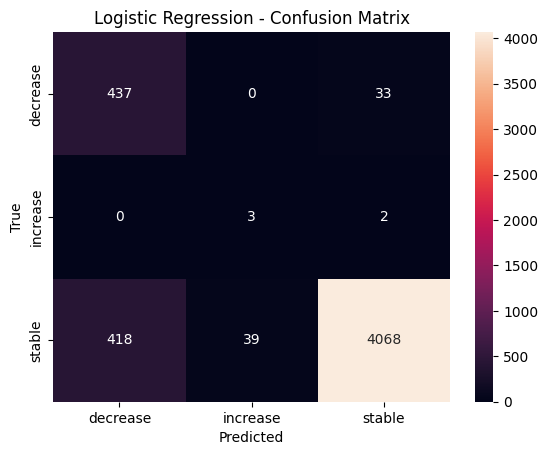

In [139]:
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ('preprocess', preprocess),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression")
print("Accuracy:", round(acc, 8))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", round(f1, 8))

clf_report = classification_report(y_test, y_pred, output_dict=True)
print("Class-wise Recall:")
for cls in model.named_steps['clf'].classes_:
    recall = clf_report[cls]['recall']
    print(f"  - {cls}: {round(recall, 8)}")

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Support Vector Machine
Accuracy: 0.954
F1-score: 0.59501869
Class-wise Recall:
  - decrease: 0.99574468
  - increase: 0.0
  - stable: 0.95071823


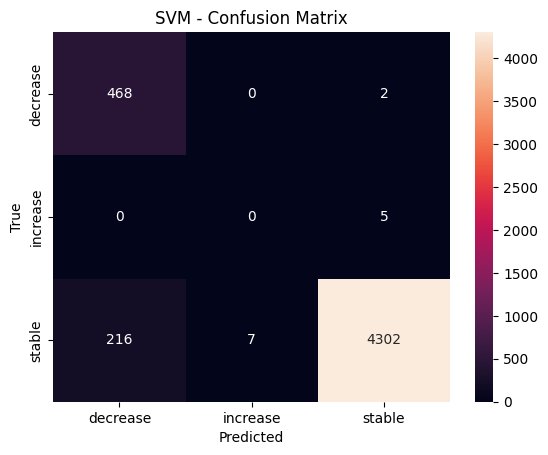

In [140]:
from sklearn.svm import SVC

model = Pipeline([
    ('preprocess', preprocess),
    ('clf', SVC(kernel='rbf', class_weight='balanced'))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Support Vector Machine")
print("Accuracy:", round(acc, 8))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", round(f1, 8))

clf_report = classification_report(y_test, y_pred, output_dict=True)
print("Class-wise Recall:")
for cls in model.named_steps['clf'].classes_:
    recall = clf_report[cls]['recall']
    print(f"  - {cls}: {round(recall, 8)}")

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [141]:
pip install xgboost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:09:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier
Accuracy: 0.9992
F1-score: 0.96175516
Class-wise Recall:
  - decrease: 1.0
  - increase: 0.8
  - stable: 0.99933702


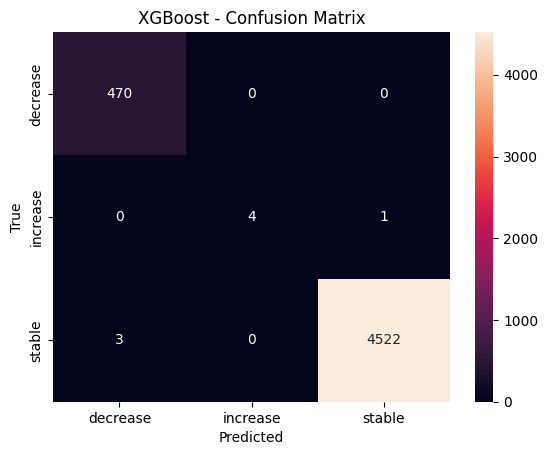

In [142]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

model = Pipeline([
    ('preprocess', preprocess),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

model.fit(X_train, y_train_enc)
y_pred_enc = model.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

acc = accuracy_score(y_test, y_pred)
print("XGBoost Classifier")
print("Accuracy:", round(acc, 8))

f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", round(f1, 8))

clf_report = classification_report(y_test, y_pred, output_dict=True)
print("Class-wise Recall:")
for cls in le.classes_:
    recall = clf_report[cls]['recall']
    print(f"  - {cls}: {round(recall, 8)}")

cm = confusion_matrix(y_test, y_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


XGBClassifier is the best model among models tried above.

#🧠 Key Drivers of Credit Score Movement

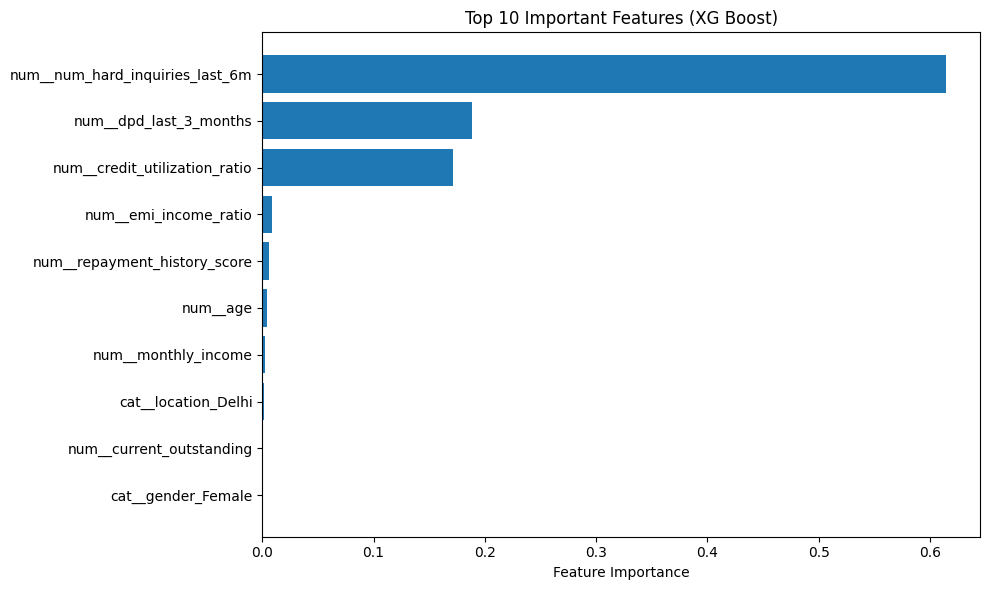

In [143]:
xgb = model.named_steps["clf"]

feature_names = model.named_steps["preprocess"].get_feature_names_out()

importances = xgb.feature_importances_
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(10), importances[sorted_idx[:10]][::-1], align='center')
plt.yticks(range(10), [feature_names[i] for i in sorted_idx[:10]][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (XG Boost)")
plt.tight_layout()
plt.show()


##📈 Policy and Product Interventions Based on Model Insights

###High-Risk Segments (likely credit score decrease)


| Feature                           | Insight                                                        |
| --------------------------------- | -------------------------------------------------------------- |
| `num__num_hard_inquiries_last_6m` | Excessive loan/credit applications = possible financial stress |
| `num__dpd_last_3_months`          | Missed or delayed payments = poor repayment behavior           |
| `num__credit_utilization_ratio`   | Overuse of credit limit = risk of default                      |
| `num__emi_income_ratio`           | High burden of EMI = low repayment buffer                      |


Recommended Interventions:

🔹 1. Preemptive Credit Review : Flag customers with high dpd, inquiries, or utilization, Review credit limit and restrict further credit expansion

🔹 2. Financial Wellness Nudges : Push monthly reminders before EMI due dates, Offer budgeting tools in mobile app

🔹 3. Restructured Loan Offers : Customers with high EMI/income ratio could be offered lower-tenure or lower-EMI restructured plans to reduce burden

🔹 4. Pause or Limit New Credit : For customers with >4 hard inquiries in 6 months → temporarily restrict new loans

###High-Opportunity Segments (likely credit score increase)

| Feature                             | Insight                        |
| ----------------------------------- | ------------------------------ |
| Low `num__dpd_last_3_months`        | On-time repayment behavior     |
| Low `num__credit_utilization_ratio` | Responsible credit usage       |
| High `num__repayment_history_score` | Good long-term credit behavior |
| Low `emi_income_ratio`              | Financially well-positioned    |

Recommended Interventions:

🔹 1. Pre-approved Credit Products : Offer personal loans or credit card upgrades with low interest rates

🔹 2. Loyalty Rewards or Credit Boosts : Promote offers such as cashback, waived fees, or increased credit limits to boost retention

🔹 3. Refinancing Opportunities : Provide home loan/big-ticket refinancing options with better terms

🔹 4. Referral Incentives : Financially healthy customers can be encouraged to refer peers, bringing similar low-risk users to your platform

# Included Stratified K-Fold

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:09:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:09:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:09:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:09:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:09:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Evaluation
Accuracy: 1.0
F1-score: 1.0
Class-wise Recall:
  - decrease: 1.0
  - increase: 1.0
  - stable: 1.0


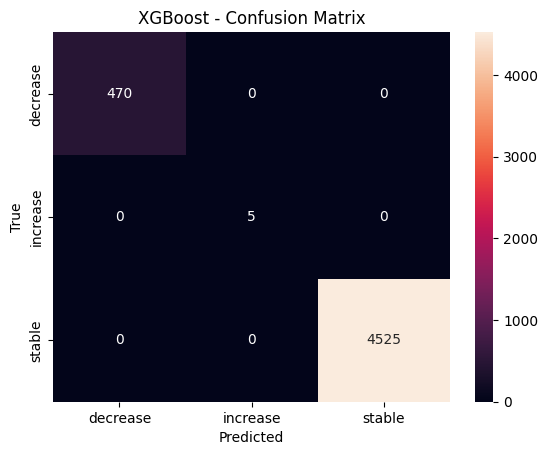

In [144]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('classifier', xgb_model)
])

le = LabelEncoder()
y_encoded = le.fit_transform(y)

acc_scores, f1_scores = [], []
best_model, best_f1 = None, 0

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_encoded), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    acc_scores.append(acc)
    f1_scores.append(f1)

    if f1 > best_f1:
        best_model = pipeline
        best_f1 = f1
        best_y_test = y_test
        best_y_pred = y_pred

y_pred_labels = le.inverse_transform(best_y_pred)
y_test_labels = le.inverse_transform(best_y_test)

print("XGBoost Evaluation")
print("Accuracy:", round(accuracy_score(y_test_labels, y_pred_labels), 8))
print("F1-score:", round(f1_score(y_test_labels, y_pred_labels, average='macro'), 8))

report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
print("Class-wise Recall:")
for cls in le.classes_:
    print(f"  - {cls}: {round(report[cls]['recall'], 8)}")

cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
